# Name: Gaurav Garg
Reg No.: **RA1811026010060**

# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import matplotlib.pyplot as plt

# Import Dataset

**Note**
> * We divide the test and train dataset by 255 to normalize the data.
* As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

In [2]:
mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
model= Sequential()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)

(60000, 28, 28)


# Build Model

In [4]:
model.add(CuDNNLSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

**Note**
> * We use Adam Optimizer and use spare categorical crossentropy as our Loss.
* We use Accuracy as out metrics

In [5]:
opt=tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 45s 7ms/step - loss: 0.7715 - accuracy: 0.7428 - val_loss: 0.1469 - val_accuracy: 0.9567
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1347 - accuracy: 0.9648 - val_loss: 0.0672 - val_accuracy: 0.9810
Epoch 3/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0909 - accuracy: 0.9768 - val_loss: 0.0658 - val_accuracy: 0.9817


**Note**
> * After training we get a validation accuracy of 98.17%

7


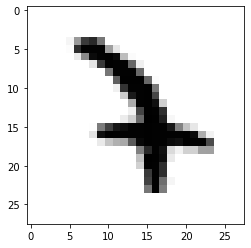

In [8]:
image_index = 4433
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28))
print(pred.argmax())